파일 불러오기 - white_wine_quailty

In [4]:
import pandas as pd

file = r'F:\AI_KDT7\08.ML\mini\wine\winequality-white.csv'
white_wine = pd.read_csv(file)

등급 분류 

In [5]:
# 정보 확인 - 결측치치

white_wine.info()

'''
결측치 없음 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


'\n결측치 없음 \n'

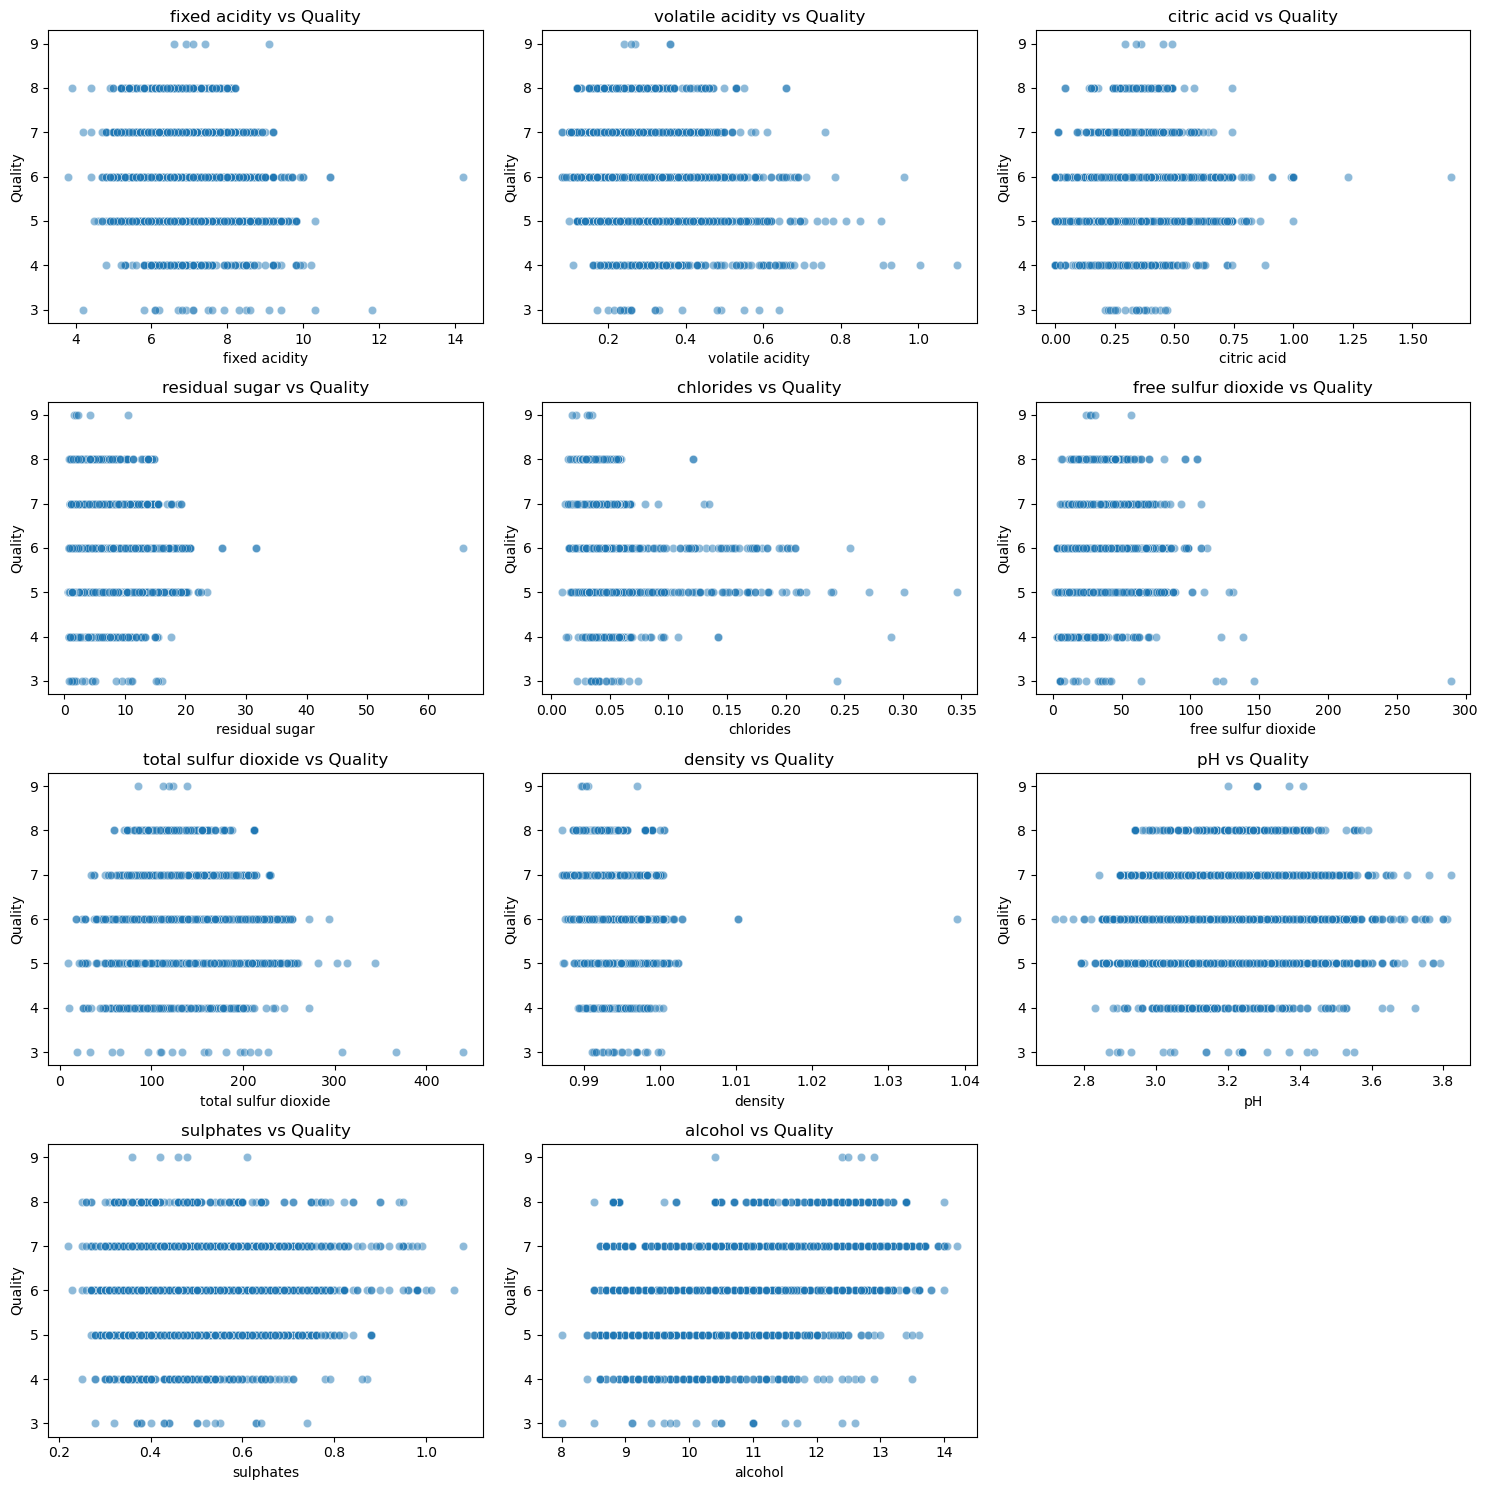

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 그리기 - quaility를 기준으로 각 피처들의 분포 정도를 확인하고자 함

plt.figure(figsize=(15, 15))
features = white_wine.columns[:-1]  # 품질을 제외한 모든 특성

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(data=white_wine, x=feature, y='quality', alpha=0.5)
    plt.title(f'{feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()


In [7]:
# 박스 플랏 - 각 피처들의 이상치를 파악하고자 함

plt.figure(figsize=(15, 15))



<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

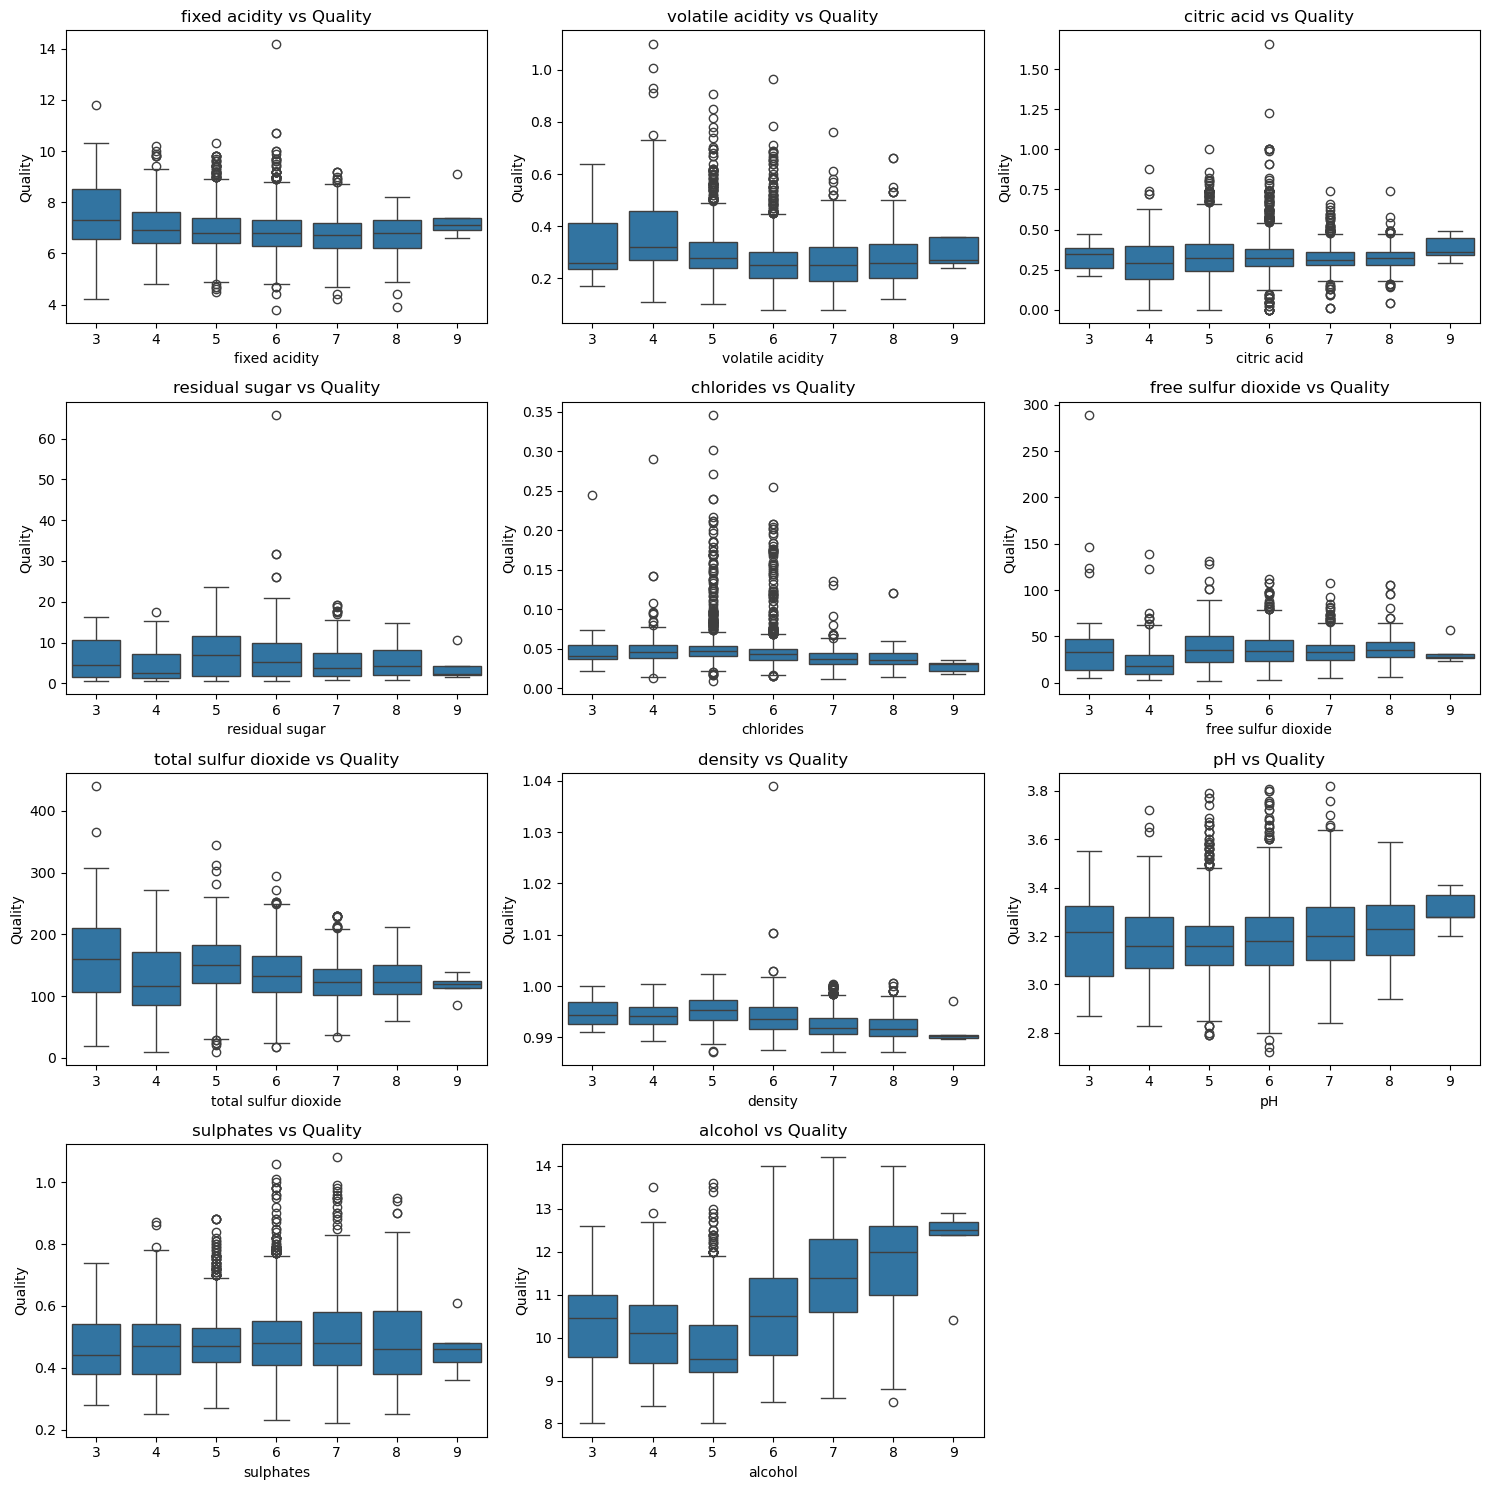

In [8]:
# 박스 플랏 - 이상치를 알아보고자 각 quailty의 수치를 제외하고 이상치를 탐색하고자 함

plt.figure(figsize=(15, 15))
features = white_wine.columns[:-1]  # 품질을 제외한 모든 특성

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=white_wine, x='quality', y=feature)
    plt.title(f'{feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split    # train set과 test set의 분리를 위함 

from sklearn.linear_model import LogisticRegression     # 로지스틱 회귀
from sklearn.svm import SVC                             # 서포트 벡터 머신
from sklearn.neighbors import KNeighborsClassifier      # K-최근접 이웃
from sklearn.naive_bayes import GaussianNB              # 나이브 베이즈
from sklearn.tree import DecisionTreeClassifier         # 결정 트리
from sklearn.ensemble import RandomForestClassifier     # 랜덤 포레스트

from sklearn.metrics import accuracy_score              # 


X = white_wine.drop(['quality'], axis=1)
y = white_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 로지스틱
# wine_LR = LogisticRegression(C=0.5, random_state=42)
# wine_LR.fit(X_train, y_train)
# pre_y_LR = wine_LR.predict(X_test)

# SVC
wine_svc = SVC()
wine_svc.fit(X_train, y_train)
pre_y_svc = wine_svc.predict(X_test)

# KNN
wine_KNN = KNeighborsClassifier(5)
wine_KNN.fit(X_train, y_train)
pre_y_KNN = wine_KNN.predict(X_test)

# NB
wine_NB = GaussianNB()
wine_NB.fit(X_train, y_train)
pre_y_NB = wine_NB.predict(X_test)

# Decision Tree
wine_DT = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_DT.fit(X_train, y_train)
pre_y_tree = wine_DT.predict(X_test)

# Random Forest
wine_rfc = RandomForestClassifier(n_estimators=200)
wine_rfc.fit(X_train, y_train)
pre_y_rfc = wine_rfc.predict(X_test)

# 모델 결정값들 비교
acc_df = pd.DataFrame({'classifier':['SVC', 'KNN', 'NB', 'DT', 'RF'],
                       'accuary': [accuracy_score(y_test, pre_y_svc),
                                   accuracy_score(y_test, pre_y_KNN),
                                   accuracy_score(y_test, pre_y_NB),
                                   accuracy_score(y_test, pre_y_tree),
                                   accuracy_score(y_test, pre_y_rfc)]})


In [10]:
acc_df

,classifier,accuary
0,SVC,0.442857
1,KNN,0.482653
2,NB,0.438776
3,DT,0.496939
4,RF,0.709184


In [11]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(grid_search.best_params_)

'''{'max_depth': 20, 
'max_features': 'sqrt', 
'min_samples_leaf': 1,
'min_samples_split': 5, 
'n_estimators': 300}'''

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


"{'max_depth': 20, \n'max_features': 'sqrt', \n'min_samples_leaf': 1,\n'min_samples_split': 5, \n'n_estimators': 300}"

Accuracy: 0.6979592
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.83      0.20      0.32        25
           5       0.72      0.69      0.71       291
           6       0.66      0.81      0.73       432
           7       0.77      0.58      0.66       192
           8       0.83      0.43      0.57        35

    accuracy                           0.70       980
   macro avg       0.64      0.45      0.50       980
weighted avg       0.71      0.70      0.69       980



c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


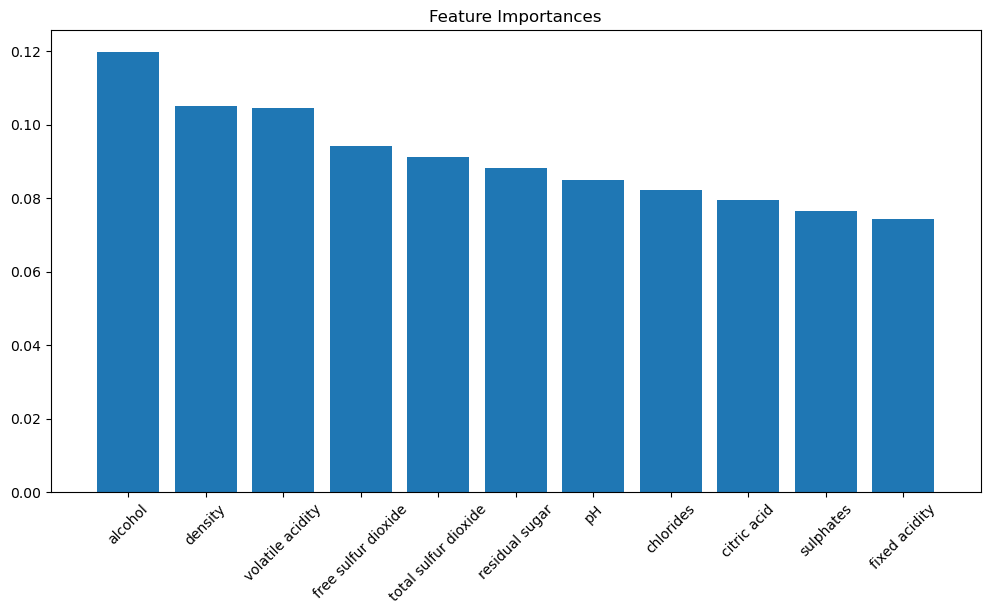

'\nAccuracy: 0.6979592\n              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         5\n           4       0.83      0.20      0.32        25\n           5       0.72      0.69      0.71       291\n           6       0.66      0.81      0.73       432\n           7       0.77      0.58      0.66       192\n           8       0.83      0.43      0.57        35\n\n    accuracy                           0.70       980\n   macro avg       0.64      0.45      0.50       980\nweighted avg       0.71      0.70      0.69       980\n'

In [12]:
# 최적의 파라미터로 재학습

best_model = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

'''
Accuracy: 0.6979592
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.83      0.20      0.32        25
           5       0.72      0.69      0.71       291
           6       0.66      0.81      0.73       432
           7       0.77      0.58      0.66       192
           8       0.83      0.43      0.57        35

    accuracy                           0.70       980
   macro avg       0.64      0.45      0.50       980
weighted avg       0.71      0.70      0.69       980
'''

In [13]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# 레이블 인코딩 (0부터 시작하도록 변환)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


'''
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
  
Accuracy: 0.6795918
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.56      0.36      0.44        25
           2       0.70      0.70      0.70       291
           3       0.67      0.76      0.71       432
           4       0.72      0.56      0.63       192
           5       0.59      0.46      0.52        35

    accuracy                           0.68       980
   macro avg       0.54      0.47      0.50       980
weighted avg       0.68      0.68      0.67       980
'''

c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\xgboost\training.py:183: UserWarning: [13:32:29] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6795918
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.56      0.36      0.44        25
           2       0.70      0.70      0.70       291
           3       0.67      0.76      0.71       432
           4       0.72      0.56      0.63       192
           5       0.59      0.46      0.52        35

    accuracy                           0.68       980
   macro avg       0.54      0.47      0.50       980
weighted avg       0.68      0.68      0.67       980



c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'\nParameters: { "use_label_encoder" } are not used.\n\n  warnings.warn(smsg, UserWarning)\n  \nAccuracy: 0.6795918\n              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         5\n           1       0.56      0.36      0.44        25\n           2       0.70      0.70      0.70       291\n           3       0.67      0.76      0.71       432\n           4       0.72      0.56      0.63       192\n           5       0.59      0.46      0.52        35\n\n    accuracy                           0.68       980\n   macro avg       0.54      0.47      0.50       980\nweighted avg       0.68      0.68      0.67       980\n'

In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

# XGBoost 모델 생성
xgb_model = XGBClassifier(eval_metric='mlogloss')

# GridSearchCV 설정
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# 하이퍼파라미터 최적화
grid_search.fit(X_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {best_accuracy:.7f}')

'''
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Model Accuracy: 0.6632653
'''

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best Model Accuracy: 0.6632653


"\nBest Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}\nBest Model Accuracy: 0.6632653\n"

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 개별 모델 정의
model1 = XGBClassifier(eval_metric='mlogloss')
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression()
model4 = DecisionTreeClassifier()

# 보팅 앙상블 모델 생성 (하드 보팅)
voting_model = VotingClassifier(estimators=[
    ('xgb', model1),
    ('lr', model3),
    ('rf', model2),
    ('DT', model4)],
    voting='hard'  # 또는 'soft'로 바꿀 수 있음
)

# 보팅 모델 학습
voting_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_voting = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Model Accuracy: {voting_accuracy:.7f}')

'''Voting Model Accuracy: 0.6897959'''


c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Model Accuracy: 0.6908163


'Voting Model Accuracy: 0.6897959'

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,  k_neighbors=4)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\n6677\anaconda3\envs\wine_ml\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\n6677\anaconda3\envs\wine_ml\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\n6677\anaconda3\envs\wine_ml\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\n6677\anaconda3\envs\wine_ml\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Accuracy: 0.8999350
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       428
           4       0.91      0.99      0.95       434
           5       0.84      0.80      0.82       469
           6       0.77      0.68      0.72       446
           7       0.83      0.87      0.85       432
           8       0.95      0.97      0.96       453
           9       1.00      1.00      1.00       416

    accuracy                           0.90      3078
   macro avg       0.90      0.90      0.90      3078
weighted avg       0.90      0.90      0.90      3078



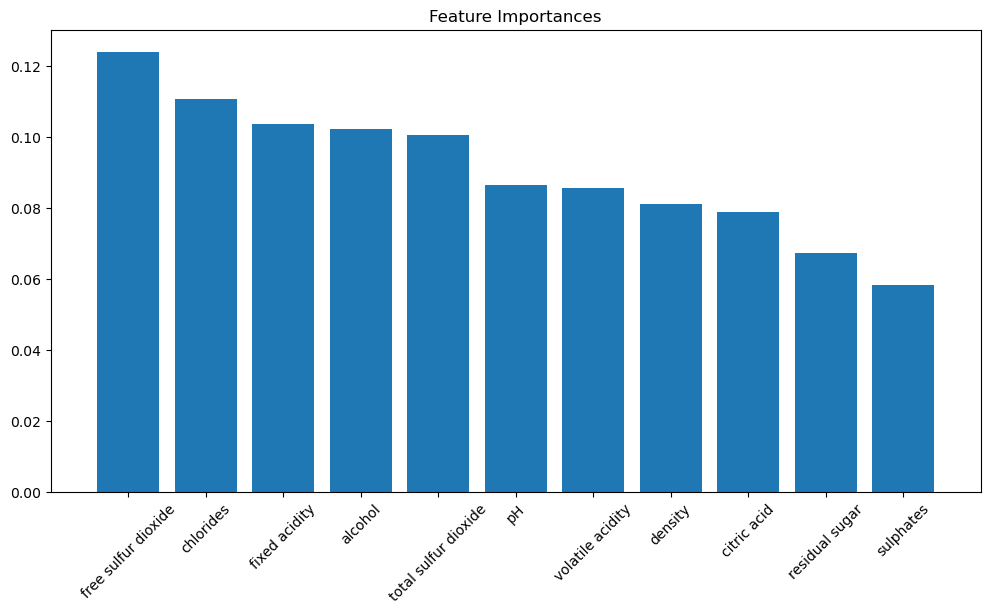

'\nAccuracy: 0.8999350\n              precision    recall  f1-score   support\n\n           3       0.99      1.00      1.00       428\n           4       0.91      0.99      0.95       434\n           5       0.84      0.80      0.82       469\n           6       0.77      0.68      0.72       446\n           7       0.83      0.87      0.85       432\n           8       0.95      0.97      0.96       453\n           9       1.00      1.00      1.00       416\n\n    accuracy                           0.90      3078\n   macro avg       0.90      0.90      0.90      3078\nweighted avg       0.90      0.90      0.90      3078\n'

In [17]:
### SMOTE 이전 GridSearchCV의 파라미터로 실시한 결과
best_model = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

'''
Accuracy: 0.8999350
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       428
           4       0.91      0.99      0.95       434
           5       0.84      0.80      0.82       469
           6       0.77      0.68      0.72       446
           7       0.83      0.87      0.85       432
           8       0.95      0.97      0.96       453
           9       1.00      1.00      1.00       416

    accuracy                           0.90      3078
   macro avg       0.90      0.90      0.90      3078
weighted avg       0.90      0.90      0.90      3078
'''

In [18]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(grid_search.best_params_)

# '''{{'max_depth': 20, 
# 'max_features': 'sqrt', 
# 'min_samples_leaf': 1, 
# 'min_samples_split': 2, 
# 'n_estimators': 200}'''

KeyboardInterrupt: 

Accuracy: 0.9028590
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       428
           4       0.91      0.99      0.95       434
           5       0.83      0.80      0.82       469
           6       0.78      0.68      0.73       446
           7       0.84      0.87      0.86       432
           8       0.96      0.99      0.97       453
           9       1.00      1.00      1.00       416

    accuracy                           0.90      3078
   macro avg       0.90      0.91      0.90      3078
weighted avg       0.90      0.90      0.90      3078



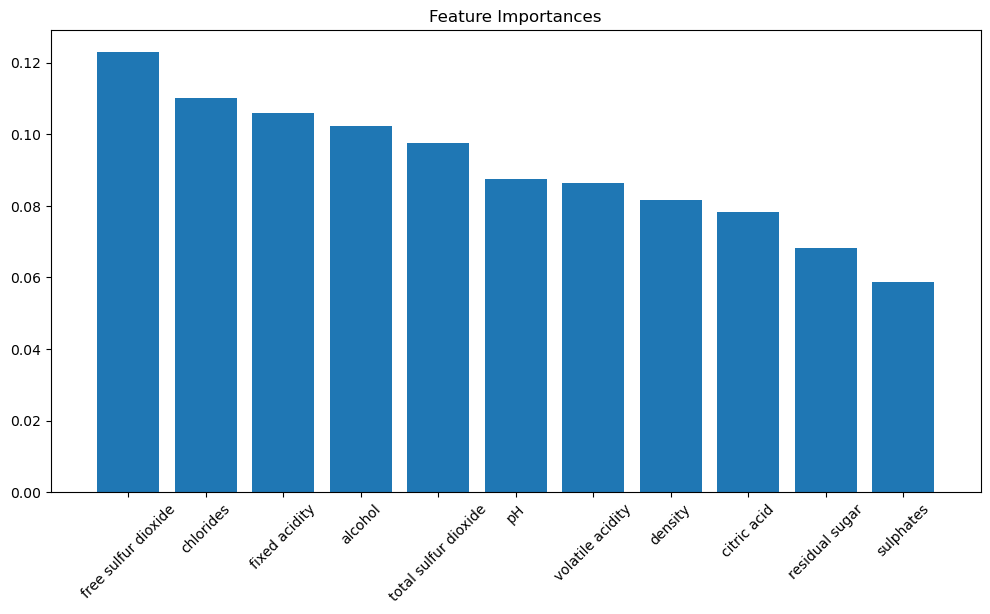

'\nAccuracy: 0.9028590\n              precision    recall  f1-score   support\n\n           3       0.99      1.00      1.00       428\n           4       0.91      0.99      0.95       434\n           5       0.83      0.80      0.82       469\n           6       0.78      0.68      0.73       446\n           7       0.84      0.87      0.86       432\n           8       0.96      0.99      0.97       453\n           9       1.00      1.00      1.00       416\n\n    accuracy                           0.90      3078\n   macro avg       0.90      0.91      0.90      3078\nweighted avg       0.90      0.90      0.90      3078\n'

In [19]:
### SMOTE 이후 GridSearchCV의 파라미터로 실시한 결과
best_model = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# import joblib

# # 모델 저장
# joblib.dump(best_model, 'random_forest_model_with_smote1.pkl')

'''
Accuracy: 0.9028590
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       428
           4       0.91      0.99      0.95       434
           5       0.83      0.80      0.82       469
           6       0.78      0.68      0.73       446
           7       0.84      0.87      0.86       432
           8       0.96      0.99      0.97       453
           9       1.00      1.00      1.00       416

    accuracy                           0.90      3078
   macro avg       0.90      0.91      0.90      3078
weighted avg       0.90      0.90      0.90      3078
'''

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted') 
    recall = recall_score(y_test, pred, average='weighted')        
    f1 = f1_score(y_test, pred, average='weighted')                
    
    # if pred_proba is not None:
    #     roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr')  # 다중 클래스 AUC
    # else:
    #     roc_auc = None

    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}')

# 예측 후 get_clf_eval 함수 호출
get_clf_eval(y_test, y_pred, y_pred_proba)


[[428   0   0   0   0   0   0]
 [  0 431   2   0   1   0   0]
 [  1  32 377  48   9   2   0]
 [  2   8  70 304  54   8   0]
 [  1   1   5  39 376  10   0]
 [  0   0   0   1   5 447   0]
 [  0   0   0   0   0   0 416]]
정확도: 0.9029, 정밀도: 0.9000, 재현율: 0.9029, F1: 0.9007


In [ ]:
import joblib

# 모델 저장
joblib.dump(best_model, 'random_forest_model_with_smote.pkl')